In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the pre-trained model
for layer in base_model.layers:
    layer.trainable = False


87910968/87910968 [==============================] - 43s 0us/step


In [3]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model_1 = Model(inputs=base_model.input, outputs=predictions)


In [4]:
model_1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
train_data_dir = 'C:/Dataset_Compare/cropweed1/train'
test_data_dir = 'C:/Dataset_Compare/cropweed1/test'
input_shape = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 212 images belonging to 2 classes.
Found 53 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


In [8]:
epochs = 10

history_1 = model_1.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/10
7/7 [==============================] - 291s 43s/step - loss: 0.4014 - accuracy: 0.8019 - val_loss: 0.2830 - val_accuracy: 0.9057
Epoch 2/10
7/7 [==============================] - 266s 40s/step - loss: 0.2001 - accuracy: 0.9575 - val_loss: 0.2394 - val_accuracy: 0.9245
Epoch 3/10
7/7 [==============================] - 266s 40s/step - loss: 0.1420 - accuracy: 0.9623 - val_loss: 0.1651 - val_accuracy: 0.9434
Epoch 4/10
7/7 [==============================] - 255s 37s/step - loss: 0.0788 - accuracy: 0.9670 - val_loss: 0.1255 - val_accuracy: 0.9811
Epoch 5/10
7/7 [==============================] - 249s 36s/step - loss: 0.0784 - accuracy: 0.9764 - val_loss: 0.1012 - val_accuracy: 0.9811
Epoch 6/10
7/7 [==============================] - 113s 13s/step - loss: 0.0441 - accuracy: 0.9953 - val_loss: 0.0777 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 91s 13s/step - loss: 0.0519 - accuracy: 0.9811 - val_loss: 0.1152 - val_accuracy: 0.9623
Epoch 8/10
7/7 [=====

In [9]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
#Plotting our loss curves
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label="Validation_loss")
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.ylabel("Losses")
  plt.legend()

  #Plot accuracy curves
  plt.figure()
  plt.plot(epochs, accuracy, label="Training_accuracy")
  plt.plot(epochs, val_accuracy, label="Validation_accuracy")
  plt.title("Accuracy curves")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()


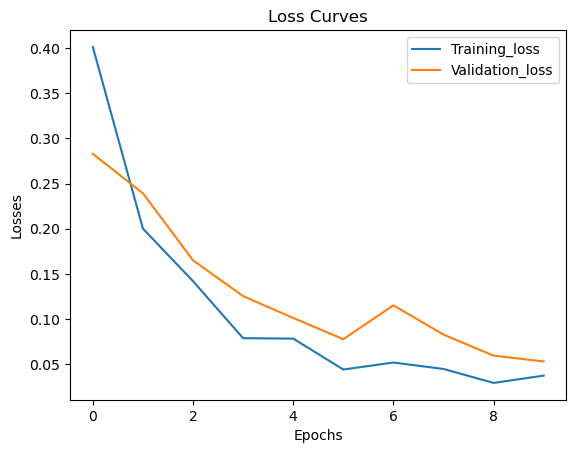

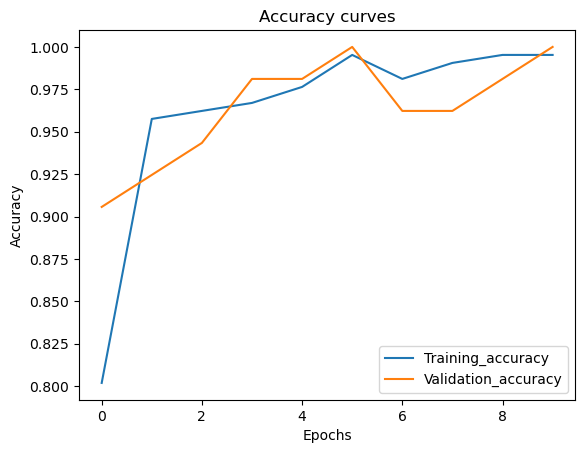

In [11]:
plot_loss_curves(history_1)

In [12]:
train_data_dir = 'C:/Dataset_Compare/cropweed2/train'
test_data_dir = 'C:/Dataset_Compare/cropweed2/test'
input_shape = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 256 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


In [13]:
model_2 = Model(inputs=base_model.input, outputs=predictions)

In [14]:
model_2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
epochs = 10

history_2 = model_2.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/10
8/8 [==============================] - 83s 10s/step - loss: 1.5976 - accuracy: 0.5664 - val_loss: 0.5493 - val_accuracy: 0.7656
Epoch 2/10
8/8 [==============================] - 74s 9s/step - loss: 0.2892 - accuracy: 0.8711 - val_loss: 0.4836 - val_accuracy: 0.8438
Epoch 3/10
8/8 [==============================] - 77s 10s/step - loss: 0.1655 - accuracy: 0.9414 - val_loss: 0.3598 - val_accuracy: 0.8594
Epoch 4/10
8/8 [==============================] - 91s 12s/step - loss: 0.1438 - accuracy: 0.9414 - val_loss: 0.3089 - val_accuracy: 0.8906
Epoch 5/10
8/8 [==============================] - 85s 11s/step - loss: 0.0951 - accuracy: 0.9727 - val_loss: 0.3111 - val_accuracy: 0.8906
Epoch 6/10
8/8 [==============================] - 86s 11s/step - loss: 0.1068 - accuracy: 0.9570 - val_loss: 0.3266 - val_accuracy: 0.8750
Epoch 7/10
8/8 [==============================] - 82s 10s/step - loss: 0.0966 - accuracy: 0.9648 - val_loss: 0.2927 - val_accuracy: 0.8906
Epoch 8/10
8/8 [============

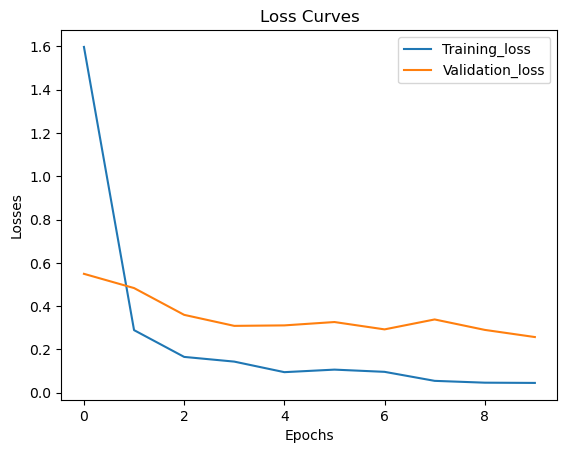

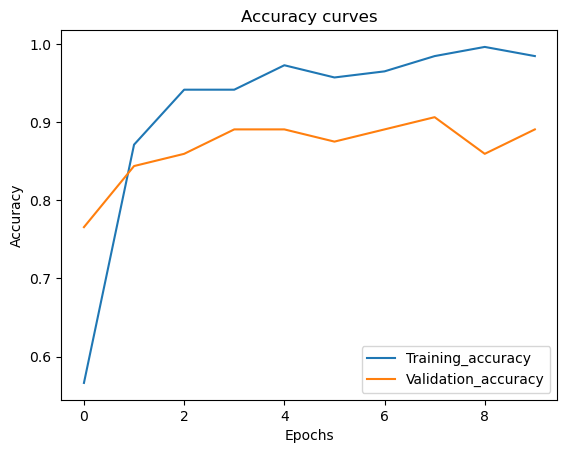

In [16]:
plot_loss_curves(history_2)